In [7]:
import pandas as pd
df = pd.read_csv("./flights edited.csv")
# add a random number (between 0-5) to the flow count column
import numpy as np
df["flow count"] = df["flow count"] + np.random.randint(0, 5, df.shape[0])
df["cases"] = df["Covid confirmed cases_src"]
df["date"] = df["date_str"]
df.head()

,airline,src,dst,routeId,date,name_src,city_src,country_src,src_lng,src_lat,...,dst_lat,airportId_dst,Covid confirmed cases_dst,Monkeypox confirmed cases_dst,airline_name,airline_country,airlineId,flow count,date_str,cases
0,4,1965,3307,2357,2030-01-01 00:00:00,La Tontouta,Noumea,New Caledonia,166.212972,-22.014553,...,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,4,2030-01-01 00:00:00,NaN
1,5,575,3307,3620,2030-01-01 00:00:00,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,38.965667,3307,113614.0,NaN,Air China,China,5,4,2030-01-01 00:00:00,NaN
2,3,575,3307,9518,2030-01-01 00:00:00,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,4,2030-01-01 00:00:00,NaN
3,3,3786,3307,9532,2030-01-01 00:00:00,Robins Afb,Macon,United States,-83.591850,32.640144,...,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,3,2030-01-01 00:00:00,NaN
4,4,1358,3307,2427,2030-01-01 00:00:00,Creil,Creil,France,2.519139,49.253547,...,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,2,2030-01-01 00:00:00,5840067.0


In [8]:
df.dtypes

airline                            int64
src                                int64
dst                                int64
routeId                            int64
date                              object
name_src                          object
city_src                          object
country_src                       object
src_lng                          float64
src_lat                          float64
airportId_src                      int64
Covid confirmed cases_src        float64
Monkeypox confirmed cases_src    float64
name_dst                          object
city_dst                          object
country_dst                       object
dst_lng                          float64
dst_lat                          float64
airportId_dst                      int64
Covid confirmed cases_dst        float64
Monkeypox confirmed cases_dst    float64
airline_name                      object
airline_country                   object
airlineId                          int64
flow count      

In [9]:
from keplergl import KeplerGl

map_1 = KeplerGl(height=600, width=800)
map_1.add_data(data=df, name="flights")
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/opt/homebrew/Caskroom/mambaforge/base/envs/geo/lib/python3.11/site-packages/jupyter_client/session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'flights': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

In [13]:
# save config
import json
config = map_1.config
with open("config.json", "w") as f:
    f.write(json.dumps(config))



## Fine tune the maps

In [19]:
df["Covid confirmed cases_src"].max(), df["Covid confirmed cases_src"].min()

(66495513.0, 2104.0)

3000000.0

<Axes: >

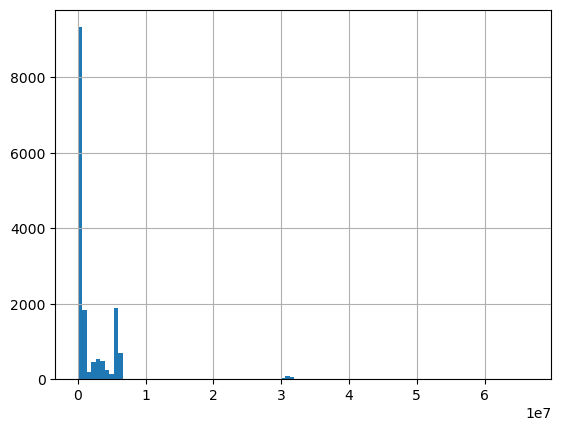

In [20]:
df["Covid confirmed cases_src"].hist(bins=100)

In [23]:
import pandas as pd
df = pd.read_csv("./flights edited.csv")
# add a random number (between 0-5) to the flow count column
import numpy as np
df["flow count"] = df["flow count"] + np.random.randint(0, 3, df.shape[0])
df["Covid confirmed cases_src"] = df["Covid confirmed cases_src"] + np.random.randint(0, 3000000, df.shape[0])
df["date"] = df["date_str"]


In [25]:
df.drop(columns=["date_str"], inplace=True, axis=1)

In [26]:
df.to_csv("./flights edited.csv", index=False)

In [33]:
df.dtypes

airline                            int64
src                                int64
dst                                int64
routeId                            int64
date                              object
name_src                          object
city_src                          object
country_src                       object
src_lng                          float64
src_lat                          float64
airportId_src                      int64
Covid confirmed cases_src        float64
Monkeypox confirmed cases_src    float64
name_dst                          object
city_dst                          object
country_dst                       object
dst_lng                          float64
dst_lat                          float64
airportId_dst                      int64
Covid confirmed cases_dst        float64
Monkeypox confirmed cases_dst    float64
airline_name                      object
airline_country                   object
airlineId                          int64
flow count      

In [34]:
df.fillna({"Covid confirmed cases_src": 0, "Covid confirmed cases_dst": 0, 
           "Monkeypox confirmed cases_src": 0, "Monkeypox confirmed cases_dst": 0,
           "flow count": 0}, inplace=True)

In [ ]:
# replace the Covid confirmed cases_src value 1 with 0

df.loc[df["Covid confirmed cases_src"] == 1, "Covid confirmed cases_src"] = 0
df.loc[df["Covid confirmed cases_dst"] == 1, "Covid confirmed cases_dst"] = 0
df.loc[df["Monkeypox confirmed cases_src"] == 1, "Monkeypox confirmed cases_src"] = 0
df.loc[df["Monkeypox confirmed cases_dst"] == 1, "Monkeypox confirmed cases_dst"] = 0


In [39]:
df.to_csv("./flights edited.csv", index=False)

In [53]:
import pandas as pd
df = pd.read_csv("./flights edited.csv")

df["cases"] = df["Covid confirmed cases_src"]

# map cov
# load config
with open("config.json", "r") as f:
    config = json.loads(f.read())
map_2 = KeplerGl(height=600, width=800, config=config)
map_2.add_data(data=df.copy(), name="flights")
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['flights'], 'id': 'lil4yvp7'…

In [52]:
config = map_2.config
with open("config.json", "w") as f:
    f.write(json.dumps(config))
    